In [1]:
import numpy as np

In [2]:
def single_bandit(n_arm, q_true, q_est, epsilon, steps, alpha=None, stationary=True, ucb_c=None):
    act_counts = np.zeros(n_arm)
    rewards = list()
    opt_act = np.argmax(q_true)
    opt_acts = list()
    for i in range(steps):
        # for exercise 2.5
        if not stationary:
            q_true += np.random.randn(n_arm) * 0.01
            opt_act = np.argmax(q_true)
        # for figure 2.4
        if ucb_c:
            a = np.argmax(q_est + ucb_c * np.sqrt(np.log(i + 1) / (act_counts + 1e-5)))
        elif np.random.rand() < epsilon:
        	a = np.random.choice(n_arm)
        else:
        	a = np.argmax(q_est)
        act_counts[a] += 1
        reward = q_true[a] + np.random.randn()
        rewards.append(reward)
        opt_acts.append(int(a == opt_act))
        # for exercise 2.5
        if alpha:
            q_est[a] += alpha * (reward - q_est[a])
        else:
            q_est[a] += 1 / act_counts[a] * (reward - q_est[a])
    return rewards, opt_acts

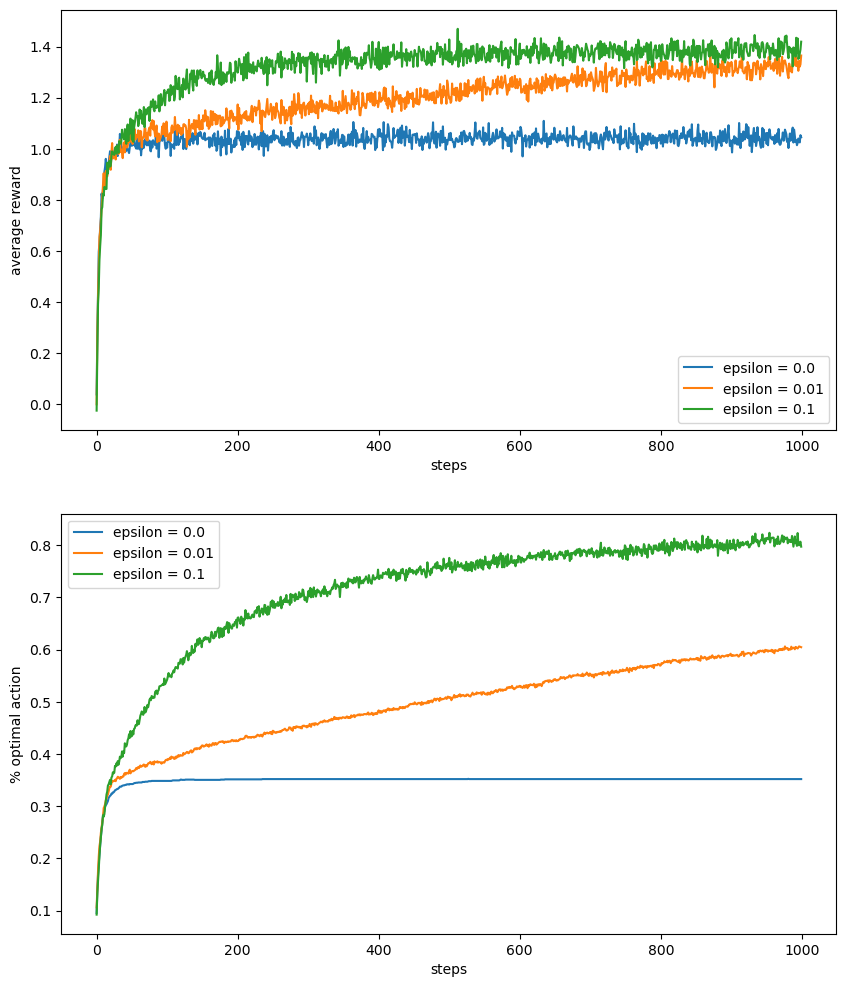

In [3]:
import matplotlib.pyplot as plt

n_arm = 10
rewards = {}
opt_acts = {}
for epsilon in [0.0, 0.01, 0.1]:
	res = [single_bandit(n_arm, np.random.randn(n_arm), np.zeros(n_arm), epsilon, 1000, alpha=None, stationary=True) for i in range(2000)]
	rs_, os_ = np.array(list(zip(*res))).mean(axis=1)
	rewards[epsilon] = rs_
	opt_acts[epsilon] = os_


plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
for k, v in rewards.items():
	plt.plot(v, label=f'epsilon = {k}')
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()

plt.subplot(2, 1, 2)
for k, v in opt_acts.items():
	plt.plot(v, label=f'epsilon = {k}')
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()

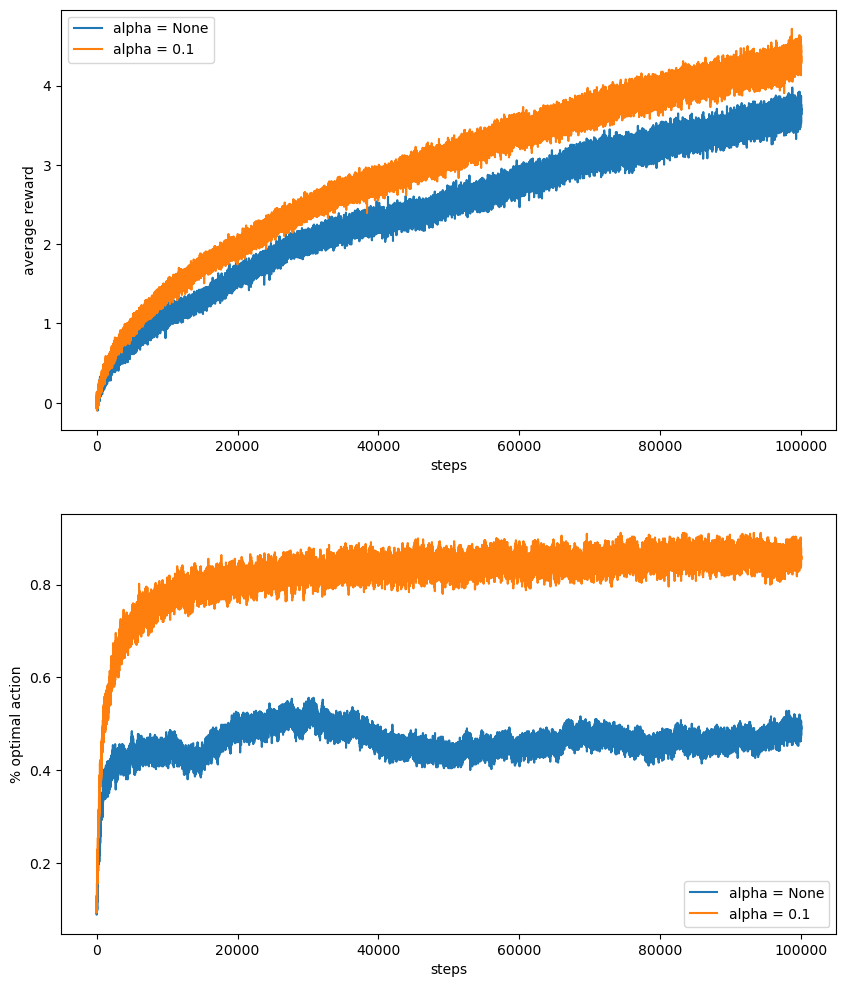

In [4]:
import matplotlib.pyplot as plt

n_arm = 10
rewards = {}
opt_acts = {}
for alpha in [None, 0.1]:
	res = [single_bandit(n_arm, np.zeros(n_arm), np.zeros(n_arm), 0.1, 100000, alpha, False) for i in range(500)]
	rs_, os_ = np.array(list(zip(*res))).mean(axis=1)
	rewards[alpha] = rs_
	opt_acts[alpha] = os_

plt.figure(figsize=(10, 12))

plt.subplot(2, 1, 1)
for k, v in rewards.items():
	plt.plot(v, label=f'alpha = {k}')
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()

plt.subplot(2, 1, 2)
for k, v in opt_acts.items():
	plt.plot(v, label=f'alpha = {k}')
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()

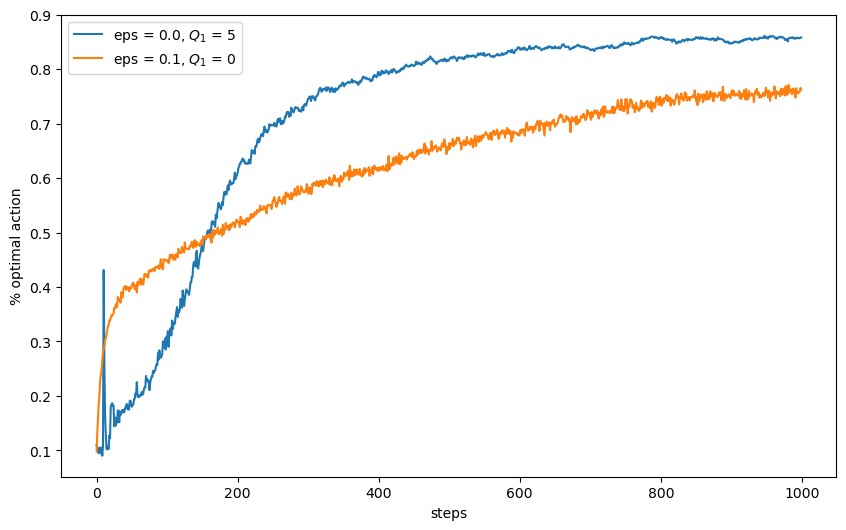

In [5]:
import matplotlib.pyplot as plt

n_arm = 10
opt_acts = {}
for q_init, eps in [(5, 0.0), (0, 0.1)]:
	res = [single_bandit(n_arm, np.random.randn(n_arm), np.zeros(n_arm) + q_init, eps, 1000, 0.1, True) for i in range(2000)]
	rs_, os_ = np.array(list(zip(*res))).mean(axis=1)
	opt_acts[eps] = os_

plt.figure(figsize=(10, 6))

for k, q_init in zip(opt_acts, [5, 0]):
	plt.plot(opt_acts[k], label=f'eps = {k}, $Q_1$ = {q_init}')
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()
plt.show()

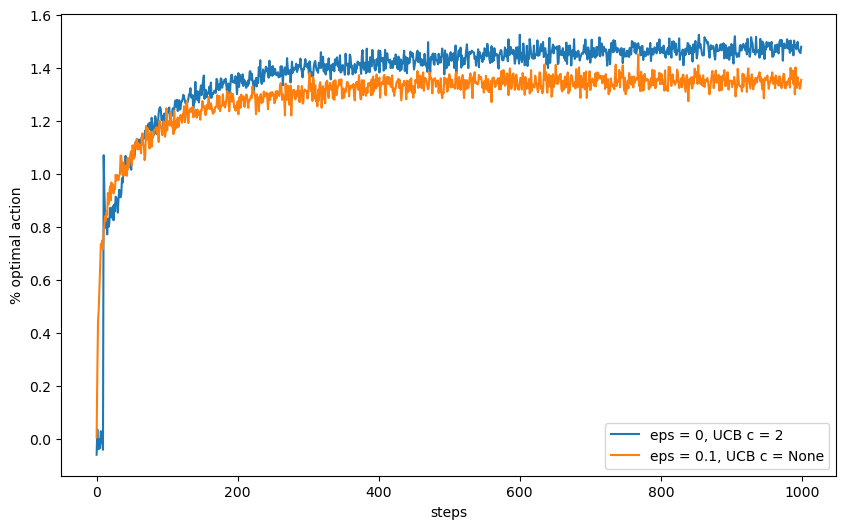

In [8]:
import matplotlib.pyplot as plt

n_arm = 10
plt.figure(figsize=(10, 6))
for ucb_c, eps in [(2, 0), (None, 0.1)]:
	res = [single_bandit(n_arm, np.random.randn(n_arm), np.zeros(n_arm), eps, 1000, ucb_c=ucb_c) for i in range(2000)]
	rs_, os_ = np.array(list(zip(*res))).mean(axis=1)
	plt.plot(rs_, label=f'eps = {eps}, UCB c = {ucb_c}')
# plt.vlines(10, -0.1, 1.5, linestyle='--', colors='black', label='11th step')
plt.xlabel('steps')
# plt.ylabel('average reward')
plt.ylabel('% optimal action')
# plt.xlim(-10, 40)
plt.legend()
plt.show()

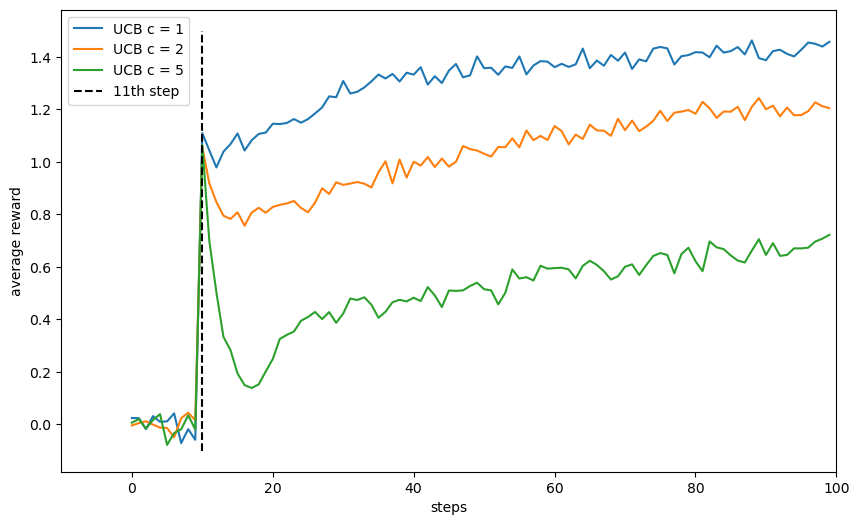

In [7]:
import matplotlib.pyplot as plt

n_arm = 10
plt.figure(figsize=(10, 6))
for ucb_c in [1, 2, 5]:
	res = [single_bandit(n_arm, np.random.randn(n_arm), np.zeros(n_arm), 0, 100, ucb_c=ucb_c) for i in range(2000)]
	rs_, os_ = np.array(list(zip(*res))).mean(axis=1)
	plt.plot(rs_, label=f'UCB c = {ucb_c}')
plt.vlines(10, -0.1, 1.5, linestyle='--', colors='black', label='11th step')
plt.xlabel('steps')
plt.ylabel('average reward')
# plt.ylabel('% optimal action')
plt.xlim(-10, 100)
plt.legend()
plt.show()